In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
STATE = 'California'
COUNTY = 'Orange'

DATA_DIR = 'nyt-data'


def calculate_daily_stats(df):
    df = df.set_index('date')
    df['death rate'] = df['deaths'] / df['cases']
    df['cases'] = df['cases'].diff().fillna(df['cases'])
    df['deaths'] = df['deaths'].diff().fillna(df['deaths'])
    return df


country_df = pd.concat(
    [
        pd.read_csv(os.path.join(DATA_DIR, 'us.csv')),
        pd.read_csv(os.path.join(DATA_DIR, 'live', 'us.csv')),
    ],
    join='inner',
)
country_df = calculate_daily_stats(country_df)
state_df = pd.concat(
    [
        pd.read_csv(os.path.join(DATA_DIR, 'us-states.csv')),
        pd.read_csv(os.path.join(DATA_DIR, 'live', 'us-states.csv')),
    ],
    join='inner',
)
state_df = calculate_daily_stats(state_df[state_df['state'] == STATE])
county_df = pd.concat(
    [
        pd.read_csv(os.path.join(DATA_DIR, 'us-counties.csv')),
        pd.read_csv(os.path.join(DATA_DIR, 'live', 'us-counties.csv')),
    ],
    join='inner',
)
county_df = calculate_daily_stats(county_df[(county_df['state'] == STATE) & (county_df['county'] == COUNTY)])

print(country_df.tail())
print(state_df.tail())
print(county_df.tail())

              cases  deaths  death rate
date                                   
2020-08-04  53395.0  1358.0    0.032917
2020-08-05  53726.0  1253.0    0.032810
2020-08-06  57338.0  1071.0    0.032645
2020-08-07  60975.0  1354.0    0.032516
2020-08-08  52899.0   944.0    0.032361
                 state  fips   cases  deaths  death rate
date                                                    
2020-08-04  California     6  5023.0   196.0    0.018389
2020-08-05  California     6  5518.0   170.0    0.018518
2020-08-06  California     6  8237.0   148.0    0.018510
2020-08-07  California     6  7129.0   183.0    0.018603
2020-08-08  California     6  7840.0   102.0    0.018524
            county       state    fips  cases  deaths  death rate
date                                                             
2020-08-04  Orange  California  6059.0  253.0     2.0    0.017154
2020-08-05  Orange  California  6059.0   65.0    12.0    0.017440
2020-08-06  Orange  California  6059.0  580.0    32.0    

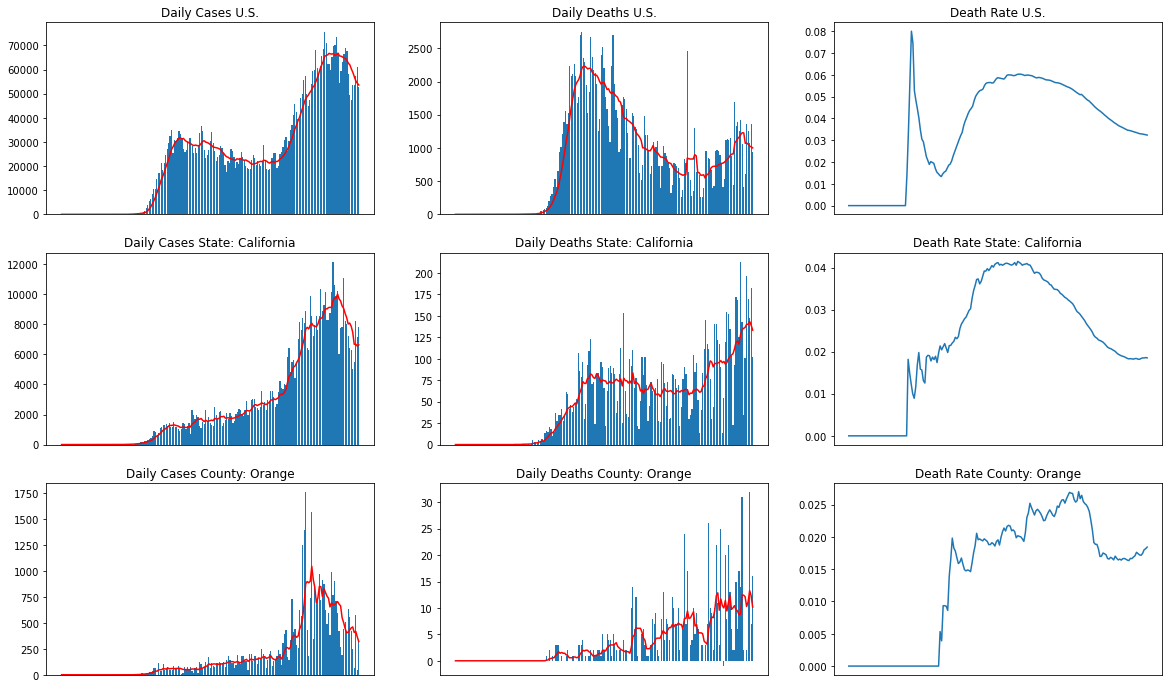

In [3]:
SIZE = (20, 12)


fig, axs = plt.subplots(3, 3, figsize=SIZE)


def draw_graphs(ax_row, df, region_label):
    ax_row[0].set(xticks=[], title=f'Daily Cases {region_label}')
    ax_row[0].bar(df.index, df['cases'])
    ax_row[0].plot(df.index, df['cases'].rolling(7, 1).mean(), color='red')
    
    ax_row[1].set(xticks=[], title=f'Daily Deaths {region_label}')
    ax_row[1].bar(df.index, df['deaths'])
    ax_row[1].plot(df.index, df['deaths'].rolling(7, 1).mean(), color='red')
    
    ax_row[2].set(xticks=[], title=f'Death Rate {region_label}')
    ax_row[2].plot(df.index, df['death rate'])


draw_graphs(axs[0], country_df, 'U.S.')
draw_graphs(axs[1], state_df, f'State: {STATE}')
draw_graphs(axs[2], county_df, f'County: {COUNTY}')

plt.show()